In [49]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import apply_stripes as ap

## testing
f = scipy.io.loadmat("../../datasets/Indian_pines_corrected.mat")
indian_pines_data = f['indian_pines_corrected']
print(indian_pines_data.shape)
# Choose a specific band to visualize (you can change the band index as needed)
band_index = 29

test_configs = {
    'snp_noise': True,
    'gaussian_noise': True,
    'clusters': True,
    'fragmented': True,
    'by_layers': True,
    'stripe_frequency': 0.5,
    'stripe_intensity': 0.075, 
    'salt':-1, 
    'pepper':-1, 
    'max_clusters': 10,
    'bit': 16
}

# one problem; it adds noise to the entire layer instead of only the select lines sometimes
striped = ap.add_stripes(indian_pines_data, test_configs)
selected_band = striped[:, :, band_index]
# unique_columns = np.all(selected_band == indian_pines_data[:,:,band_index], axis=0)




(145, 145, 200)


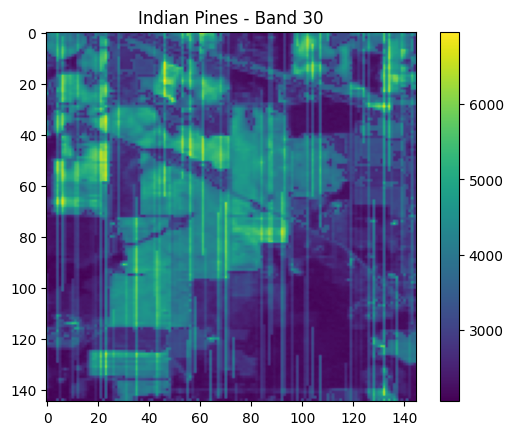

In [50]:

plt.imshow(selected_band, cmap='viridis')
plt.title(f"Indian Pines - Band {band_index + 1}")
plt.colorbar()
plt.show()

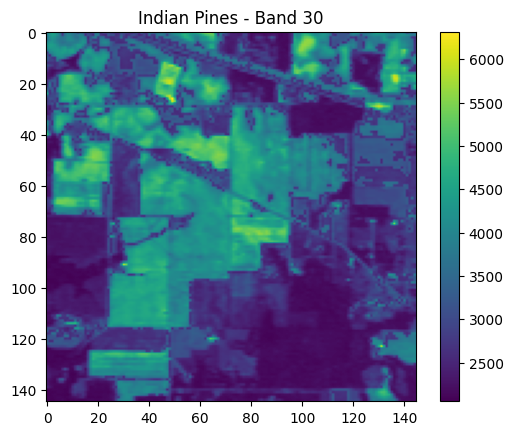

In [46]:

plt.imshow(indian_pines_data[:, :, band_index], cmap='viridis')
plt.title(f"Indian Pines - Band {band_index + 1}")
plt.colorbar()
plt.show()

